<a href="https://colab.research.google.com/github/PabasaraSenadheera/Analysis-of-Child-Mortality-Rate-Trends/blob/main/Child_Mortality_Rate_Key_Insightsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving child mortality rates all.xlsx to child mortality rates all (1).xlsx


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

In [5]:
sns.set_palette("pastel")

In [10]:
df = pd.read_excel('child mortality rates all.xlsx')

In [11]:
df = df.dropna(how='all')

In [12]:
df.set_index('Country Name', inplace=True)

In [13]:
df_years = df.T

In [14]:
df_years.index = pd.to_numeric(df_years.index)

In [15]:
print("Dataset shape:", df.shape)
print("\nFirst few countries:")
print(df.index[:20])

Dataset shape: (183, 33)

First few countries:
Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Argentina', 'Armenia', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium',
       'Belize', 'Bhutan'],
      dtype='object', name='Country Name')


<Figure size 1200x600 with 0 Axes>

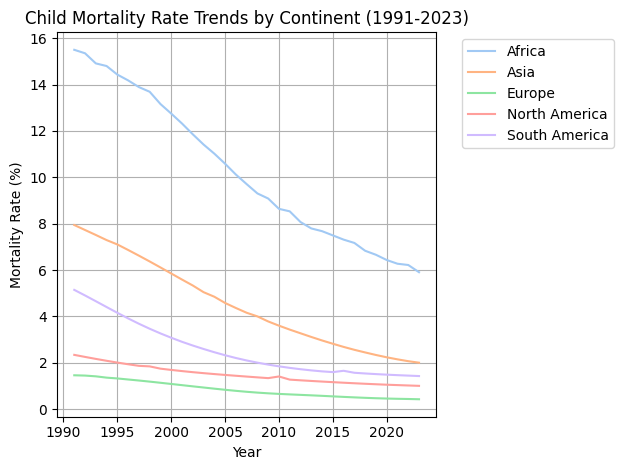

In [18]:
plt.figure(figsize=(12, 6))
df_years[['Africa', 'Asia', 'Europe', 'North America', 'South America']].plot()
plt.title('Child Mortality Rate Trends by Continent (1991-2023)')
plt.ylabel('Mortality Rate (%)')  # Updated if data is in percentage
plt.xlabel('Year')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
# Assuming 'df_years' contains mortality rates over time and its index is 'Year'
latest_year = df_years.index.max()  # Get the most recent year in the data

# Extract data for the latest year (e.g., 2023)
sorted_2023 = df_years.loc[latest_year].sort_values(ascending=False)

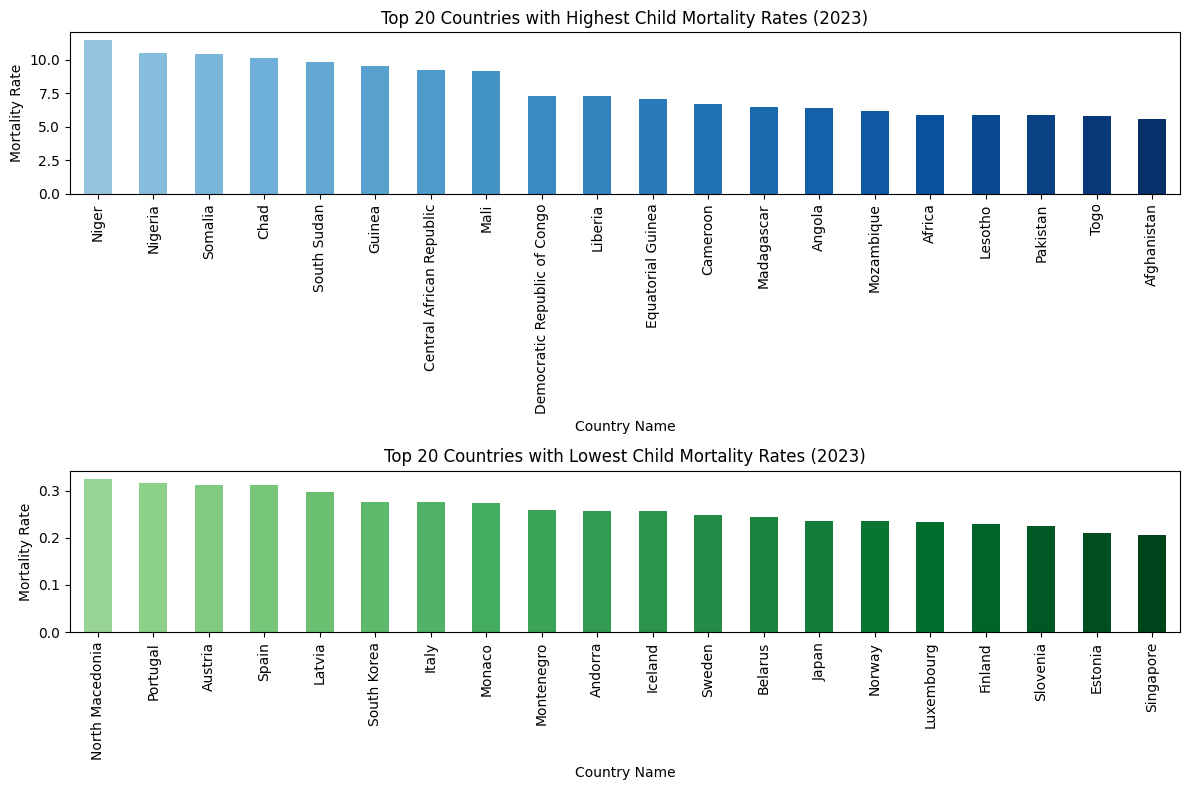

In [24]:
plt.figure(figsize=(12, 8))

# Top 20 countries with highest mortality - use blue shades
plt.subplot(2, 1, 1)
sorted_2023.head(20).plot(kind='bar', color=plt.cm.Blues(np.linspace(0.4, 1, 20)))
plt.title(f'Top 20 Countries with Highest Child Mortality Rates ({latest_year})')
plt.ylabel('Mortality Rate')

# Top 20 countries with lowest mortality - use green shades
plt.subplot(2, 1, 2)
sorted_2023.tail(20).plot(kind='bar', color=plt.cm.Greens(np.linspace(0.4, 1, 20)))
plt.title(f'Top 20 Countries with Lowest Child Mortality Rates ({latest_year})')
plt.ylabel('Mortality Rate')

plt.tight_layout()
plt.show()

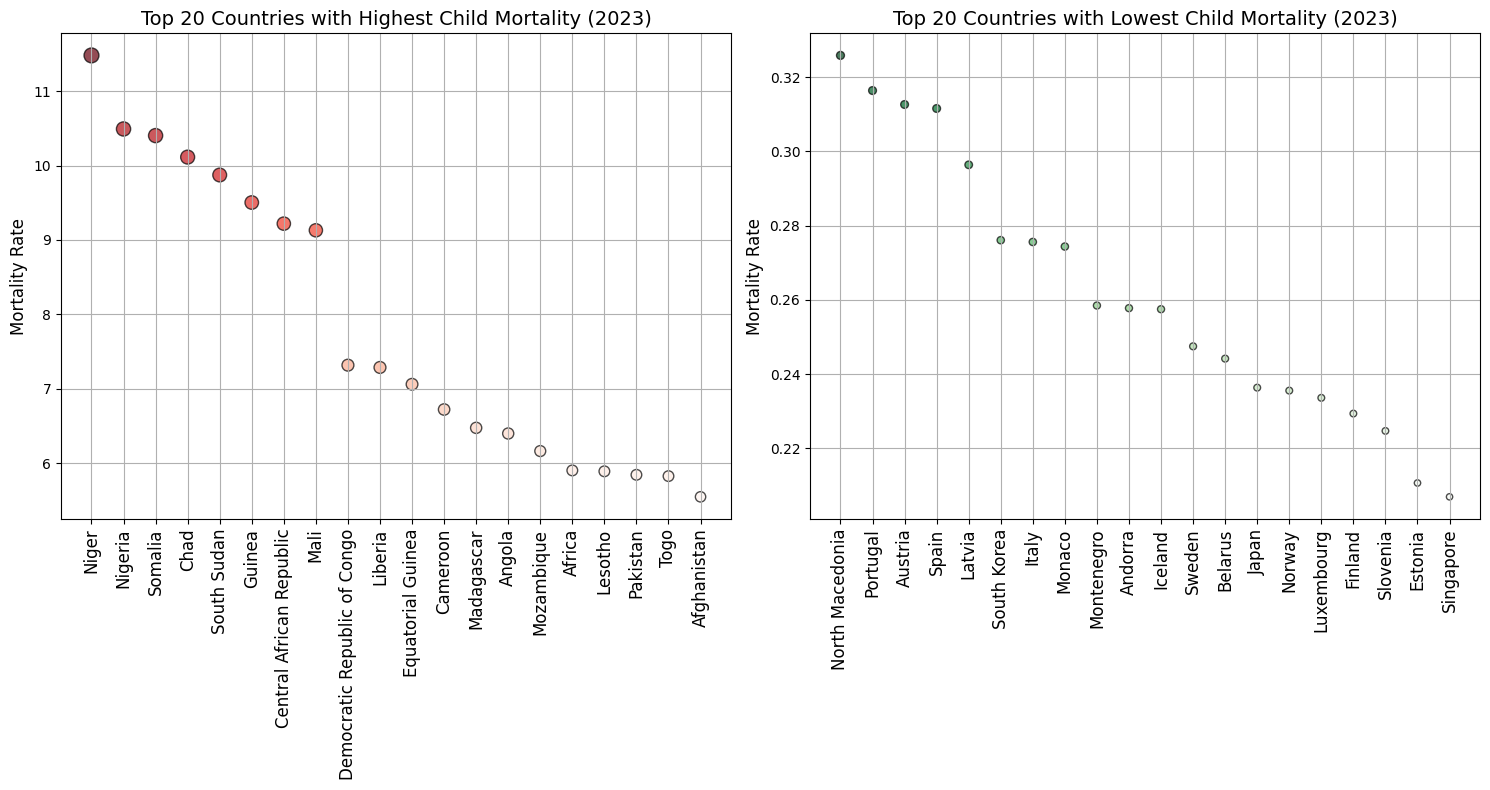

In [45]:

# Sample DataFrames for the top and bottom 20
top_20 = sorted_2023.head(20)
bottom_20 = sorted_2023.tail(20)

plt.figure(figsize=(15, 8))

# Plot Top 20 countries with high mortality
plt.subplot(1, 2, 1)
plt.scatter(top_20.index, top_20.values,
            s=top_20.values * 10,
            c=top_20.values, cmap='Reds', alpha=0.7, edgecolors='k')
plt.xticks(rotation=90, fontsize=12)
plt.title(f'Top 20 Countries with Highest Child Mortality ({latest_year})', fontsize=14)
plt.ylabel('Mortality Rate', fontsize=12)
plt.grid(True)

# Plot Bottom 20 countries with low mortality
plt.subplot(1, 2, 2)
plt.scatter(bottom_20.index, bottom_20.values,
            s=bottom_20.values * 100,
            c=bottom_20.values, cmap='Greens', alpha=0.7, edgecolors='k')
plt.xticks(rotation=90, fontsize=12)
plt.title(f'Top 20 Countries with Lowest Child Mortality ({latest_year})', fontsize=14)
plt.ylabel('Mortality Rate', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


In [73]:
print(df_years.columns)


Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Argentina', 'Armenia', 'Asia',
       ...
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country Name', length=183)


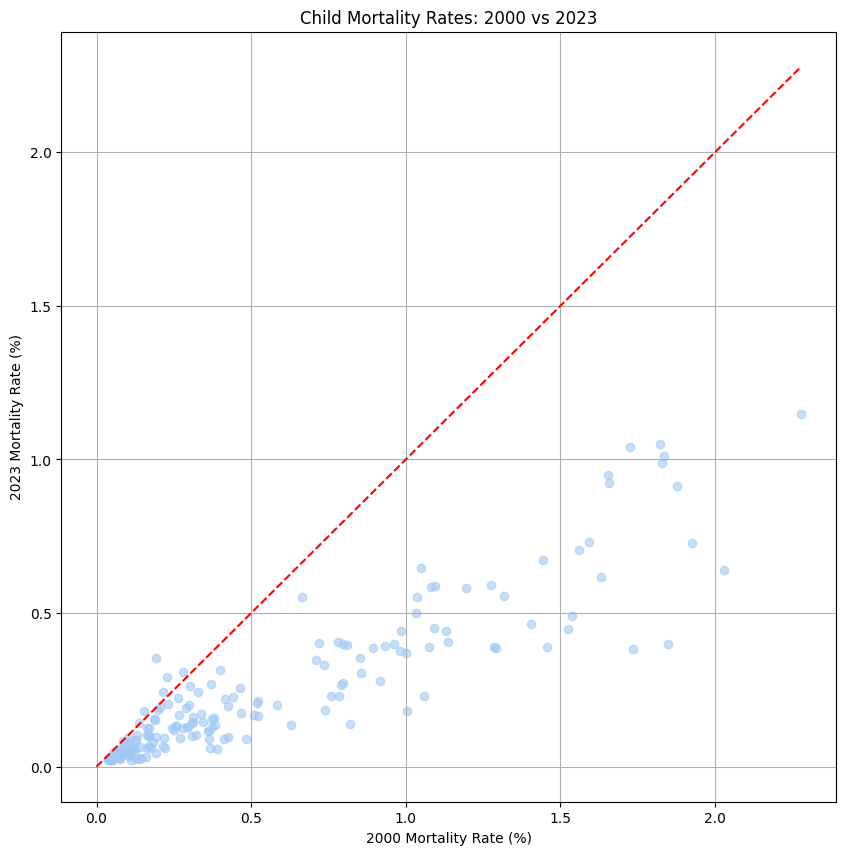

In [83]:
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(10, 10))

# Convert from per 1,000 to percentage (divide by 10)
df_years_pct = df_years / 10

# Scatter plot with percentage values
plt.scatter(df_years_pct.loc[2000], df_years_pct.loc[2023], alpha=0.6)

# Reference line (y = x)
max_rate = max(df_years_pct.loc[2000].max(), df_years_pct.loc[2023].max())
plt.plot([0, max_rate], [0, max_rate], 'r--')

# Labels with % units
plt.title('Child Mortality Rates: 2000 vs 2023')
plt.xlabel('2000 Mortality Rate (%)')
plt.ylabel('2023 Mortality Rate (%)')

plt.grid(True)
plt.show()






